In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

In [2]:
import os

In [1]:
import arcpy

In [3]:
path = r'T:\Trans Projects\Model Development\UrbanSim_LandUse\Output\Simulation_47_Final_RTP'

In [2]:
arcpy.env.workspace = r'T:\Models\StoryMap\UrbanSim\UrbanSim.gdb'

In [3]:
arcpy.env.overwriteOutput = True

In [57]:
newDev = gpd.read_file(os.path.join(path, 'new_developments.shp'))

In [58]:
newDev.head()

,btype,nsqft,rsqft,du,yrbuilt,lpid,pundev,dev_land,orsqft,onrsqft,odu,dua,nrfar,ndu,nnsqft,geometry
0,1110,0.0,2936.0,1,2031,24636,14.0,5.328463e+06,0.0,0.0,0.0,0.008175,0.0,1,0.0,"POLYGON ((4253853.761 848765.083, 4253810.813 ..."
1,1110,0.0,38182.0,13,2032,24708,0.0,2.143960e+06,2041.0,0.0,1.0,0.264128,0.0,12,0.0,"POLYGON ((4250112.863 849539.515, 4250261.656 ..."
2,1110,0.0,24384.0,8,2034,24796,0.0,1.369197e+06,3498.0,0.0,1.0,0.254514,0.0,7,0.0,"POLYGON ((4248043.221 850118.769, 4248037.169 ..."
3,1110,0.0,11762.0,4,2037,24890,9.0,2.134994e+06,2150.0,0.0,1.0,0.081611,0.0,3,0.0,"POLYGON ((4257174.792 850971.558, 4257157.732 ..."
4,1110,0.0,4829.0,2,2029,25049,0.0,8.765263e+05,0.0,0.0,0.0,0.099392,0.0,2,0.0,"POLYGON ((4253304.256 852057.125, 4254563.690 ..."


In [63]:
list(newDev.columns)

['btype',
 'nsqft',
 'rsqft',
 'du',
 'yrbuilt',
 'lpid',
 'pundev',
 'dev_land',
 'orsqft',
 'onrsqft',
 'odu',
 'dua',
 'nrfar',
 'ndu',
 'nnsqft',
 'geometry']

In [12]:
newDev['yrbuilt'].min(), newDev['yrbuilt'].max()

(2021, 2045)

In [5]:
yrbuilt = 2021

In [59]:
yrsbuilt = range(newDev['yrbuilt'].min(), newDev['yrbuilt'].max()+1, 5)

In [62]:
[x for x in range(2021, 2046, 5)]

[2021, 2026, 2031, 2036, 2041]

In [13]:
newDevAnn = newDev[newDev['yrbuilt'] == yrbuilt]

In [14]:
newDevAnn.to_file(os.path.join(path, 'newDevAnn.shp'))

In [15]:
field1 = 'du'
field1_setup = 'du "du"'
field2 = 'odu'
field2_setup = 'odu "odu"'

In [16]:
arcpy.SpatialJoin_analysis(target_features=r"V:\Data\Transportation\MTAZ16.shp", 
                           join_features=os.path.join(path, 'newDevAnn.shp'), 
                           out_feature_class="newDev_taz_"+str(yrbuilt), 
                           join_operation="JOIN_ONE_TO_ONE", join_type="KEEP_COMMON", 
                           field_mapping='TAZ_NUM "TAZ_NUM" true true false 10 Long 0 10 ,First,#,MTAZ16,TAZ_NUM,-1,-1;Shape_Area "Shape_Area" true true false 19 Double 0 0 ,First,#,MTAZ16,Shape_Area,-1,-1;'+
                           field_setup +' true true false 18 Double 0 18 ,Sum,#,newDevAnn,'+ field +',-1,-1;yrbuilt "yrbuilt" true true false 18 Double 0 18 ,First,#,newDevAnn,yrbuilt,-1,-1', 
                           match_option="CONTAINS", search_radius="", distance_field_name="")

<Result 'T:\\Models\\StoryMap\\UrbanSim\\UrbanSim.gdb\\newDev_taz_2021'>

In [17]:
arcpy.conversion.FeatureClassToShapefile("newDev_taz_" + str(yrbuilt), path)

<Result 'T:\\Trans Projects\\Model Development\\UrbanSim_LandUse\\Output\\Simulation_47_Final_RTP'>

In [6]:
newDevTaz = gpd.read_file(os.path.join(path, "newDev_taz_" + str(yrbuilt) + ".shp"))

In [7]:
newDevTaz.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: USA - Oregon - SPCS - S
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
newDevTaz = newDevTaz.to_crs(epsg=3857)

In [9]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [10]:
outpath = r'T:\Models\StoryMap\UrbanSim'

In [12]:
fieldName = 'Dwelling units'
#legendLabel = 'Dwelling units'

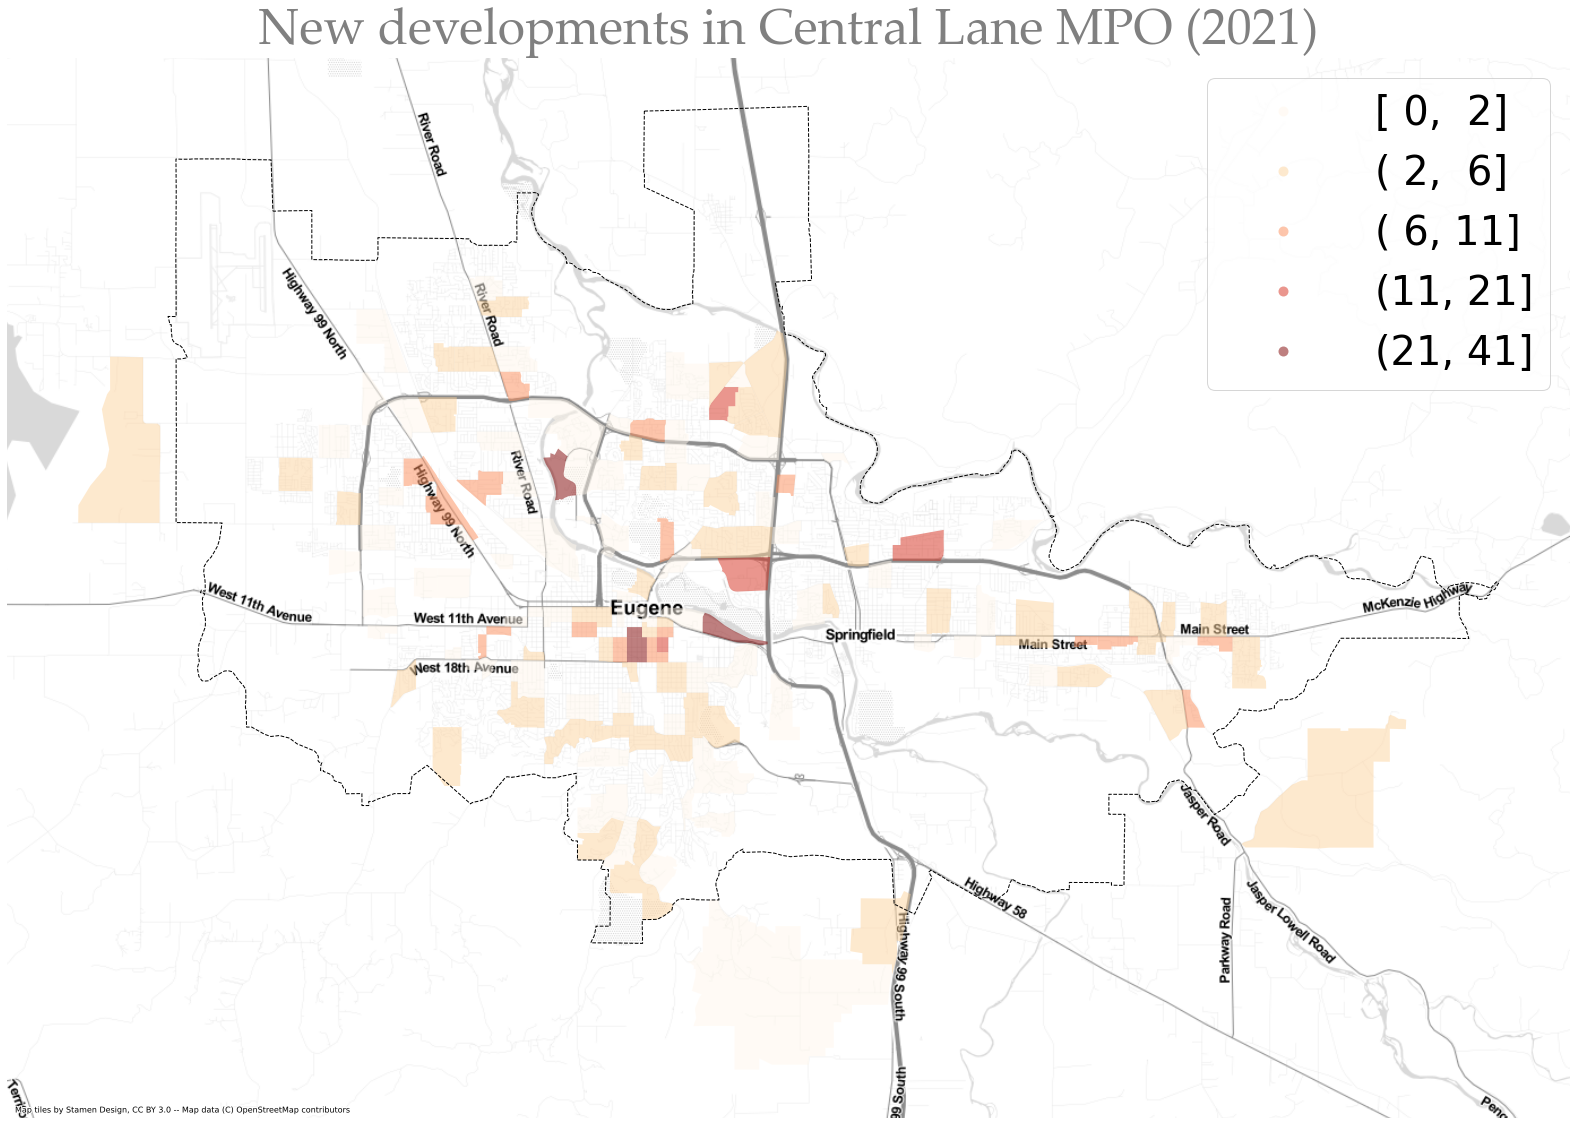

In [56]:
# cax works separately with legend_kwds
fig, ax = plt.subplots(figsize=(28, 24))
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
newDevTaz.plot(ax=ax, column='du', cmap='OrRd', alpha=.5, scheme ='NaturalBreaks', #cax=cax,
               legend=True, legend_kwds={"fmt": "{:.0f}"})
#, legend_kwds={'label': legendLabel,'orientation': "horizontal"})
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("New developments in Central Lane MPO (" + str(yrbuilt) + ")", fontsize=50, fontname="Palatino Linotype", 
          color="grey", loc = 'center')
ax.axis("off")
plt.savefig(os.path.join(outpath, "new_dev_" + str(yrbuilt) + ".png"), bbox_inches='tight')